# DTM TRAINING

# PART 1: Load and arange data

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = np.load('dtm_dcrnn_predictions.npz')


In [4]:
data.files

['predictions', 'groundtruth']

In [5]:
pred = data['predictions']
label = data['groundtruth']


In [6]:
pred[10], label[10]

(array([[71.864624, 60.34144 , 61.449173, ..., 69.36968 , 70.48951 ,
         67.26907 ],
        [71.3208  , 61.777508, 62.65655 , ..., 69.12688 , 70.38243 ,
         67.0407  ],
        [70.60107 , 62.72161 , 63.963615, ..., 69.344734, 70.39826 ,
         67.001114],
        ...,
        [70.87145 , 65.98869 , 66.91998 , ..., 68.72364 , 71.10222 ,
         68.14978 ],
        [70.764465, 65.87634 , 66.79459 , ..., 68.78566 , 71.115875,
         67.9551  ],
        [70.946304, 65.78434 , 66.82582 , ..., 68.74808 , 71.05797 ,
         67.7845  ]], dtype=float32),
 array([[70.7, 56.2, 62.4, ..., 68.9, 71.7, 66.2],
        [71.8, 58.6, 59.9, ..., 69.6, 72.7, 66.9],
        [69.1, 58.5, 61.9, ..., 69.3, 71.9, 66. ],
        ...,
        [71.3, 66.6, 68.7, ..., 68.6, 71.6, 68.4],
        [71.4, 66.9, 68.1, ..., 68.4, 71.6, 66.6],
        [72.2, 66.5, 68. , ..., 68.7, 71.6, 68.4]]))

In [7]:
pred.shape, label.shape 
print(f"{pred.shape[0]} steps, {pred.shape[1]} data from {pred.shape[2]} sensors.")

12 steps, 10419 data from 325 sensors.


# PART 2: Visualize Errors

## Reshape

In [8]:
# First reshape predictions and labels
pred = pred.reshape((pred.shape[0]*pred.shape[1]*pred.shape[2],))
label = label.reshape((label.shape[0]*label.shape[1]*label.shape[2],))

# Print new shapes
print(f"Shapes:\n\tpred: {pred.shape}\n\tlabel:{label.shape}")

Shapes:
	pred: (40634100,)
	label:(40634100,)


## Visualize Arrays

In [9]:
pred[:5], label[:5]

(array([72.65232 , 23.20747 , 56.73958 , 33.669937, 58.300705],
       dtype=float32),
 array([70.9, 24.1, 54.4, 32.6, 62.5]))

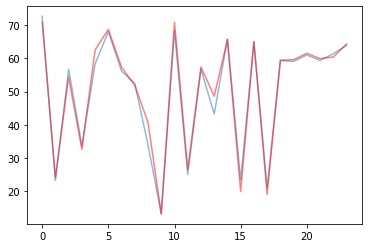

In [25]:
# Matplotlib 
N = np.arange(24)

plt.plot(N, pred[:24], alpha=0.5)
plt.plot(N, label[:24], alpha=0.5, color="red")
plt.show()

# PART 3: Absolute Error

In [10]:
absolute_error = np.abs(pred-label)
absolute_error.shape

(40634100,)

In [11]:
squared_absolute_error = np.square(absolute_error)
squared_absolute_error.shape

(40634100,)

In [12]:
sorted_squared_absolute_error = np.sort(squared_absolute_error)

In [13]:
sorted_absolute_error = np.sort(absolute_error)
sorted_absolute_error[:5]

array([0., 0., 0., 0., 0.])

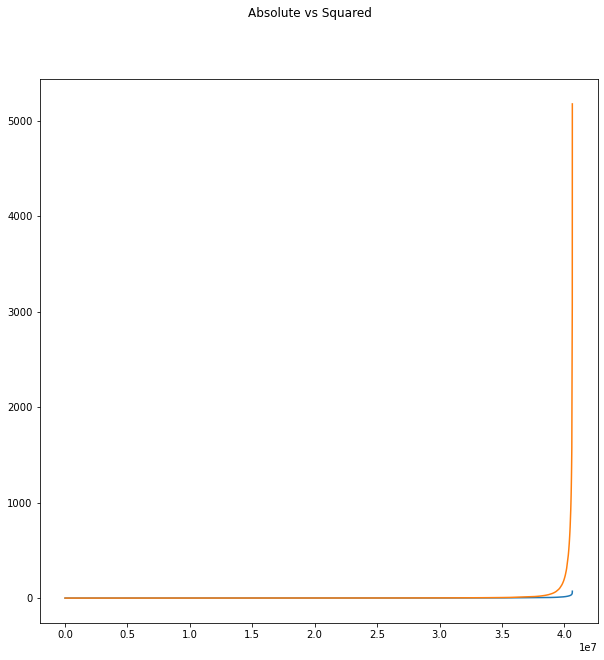

In [70]:
LOWER = 0; UPPER = sorted_absolute_error.shape[0]-10e+7
plt.figure(figsize=(10, 10))
plt.plot(np.arange(UPPER),sorted_absolute_error[LOWER:UPPER])
plt.plot(np.arange(UPPER), sorted_squared_absolute_error[LOWER:UPPER])
plt.suptitle('Absolute vs Squared')
plt.show()

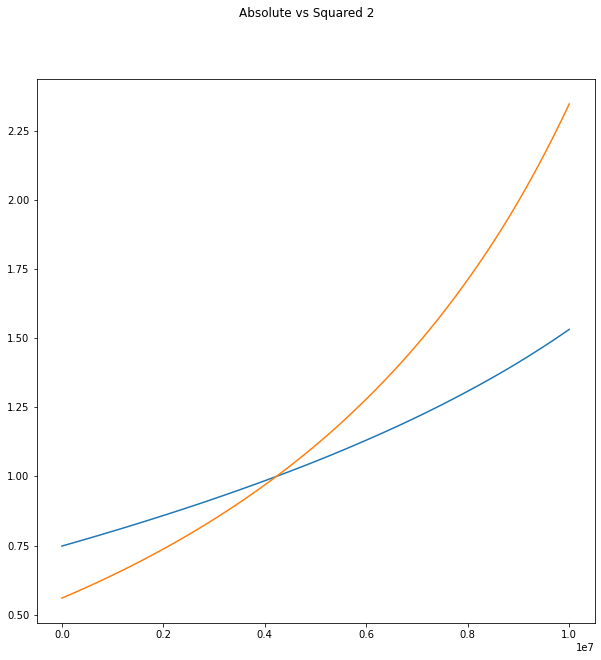

In [84]:
if LOWER or UPPER: del LOWER; del UPPER
LOWER = 20634100; UPPER = 30634100
plt.figure(figsize=(10, 10))
plt.plot(np.arange(UPPER-LOWER),sorted_absolute_error[LOWER:UPPER])
plt.plot(np.arange(UPPER-LOWER), sorted_squared_absolute_error[LOWER:UPPER])
plt.suptitle('Absolute vs Squared 2')
plt.show()

# PART 4: Measure the cardinality 
Measure the cardinality of those errors who are less than 1 and more than 1 for each group.

In [14]:
linear_less_than = np.size(sorted_absolute_error[sorted_absolute_error < 1]) 
linear_more_than = np.size(sorted_absolute_error[sorted_absolute_error > 1])
exp_less_than = np.size(sorted_squared_absolute_error[sorted_squared_absolute_error < 1])
exp_more_than = np.size(sorted_squared_absolute_error[sorted_squared_absolute_error > 1])

In [15]:
linear_less_than, exp_less_than, linear_more_than, exp_more_than

(24858951, 24858951, 15775135, 15775135)

# PART 5: Calculate the integral

If we calculate the areas between lines and compare the two sides we can comment.

In [90]:
BORDER = 24858951

First calculate the area for the first part. Less than 1 part.  
Then calculate the right of the crossing at 1.

In [92]:
AREA_LEFT = np.sum(sorted_absolute_error[:BORDER] -sorted_squared_absolute_error[:BORDER]) # LINEAR > EXP WHEN LESS THAN 1
AREA_RIGHT= np.sum(sorted_squared_absolute_error[BORDER:] - sorted_absolute_error[BORDER:]) # EXP > LINEAR WHEN MORE THAN 1
AREA_LEFT, AREA_RIGHT

(4129554.1907481635, 547109148.6284008)

In [94]:
DIFF_PERCENTAGE = (AREA_RIGHT - AREA_LEFT) / AREA_RIGHT
DIFF_PERCENTAGE

0.9924520469067261

DTM: (24858951, 24858951, 15775135, 15775135)  
BASE:(24840258, 24840258, 15793825, 15793825)

DTM has 18693 more error, who are less than 1, compared to BASE.



# PART 6: Calculate RMSE

In [16]:
mse = np.sum(sorted_squared_absolute_error)
mse

609157778.1245562

In [17]:
rmse = np.sqrt(np.divide(mse, np.size(sorted_squared_absolute_error)))
rmse

3.8718593659791276

# PART 7: Max Errors

In [29]:
sorted_squared_absolute_error[-3:]

array([5159.21378061, 5166.76032843, 5175.49018953])

In [35]:
rmse_first = np.sqrt(np.divide( np.sum(sorted_squared_absolute_error[:24858951]), np.size(sorted_squared_absolute_error[:24858951])))
rmse_first

0.5095810824843859

In [36]:
rmse_second = np.sqrt(np.divide( np.sum(sorted_squared_absolute_error[-15775135:]), np.size(sorted_squared_absolute_error[-15775135:])))
rmse_second

6.181088744141436

In [34]:
rmse_last = np.sqrt(np.divide( np.sum(sorted_squared_absolute_error[-18690:]), np.size(sorted_squared_absolute_error[-18690:])))
rmse_last

53.02966871550183